In [859]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re
import seaborn as sns
import datetime as dt
questtechnology = pd.merge (queststudy_domain,technology,right_on="quest_id",left_on="quest_id",how="left")

# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


In [860]:
enroll=pd.read_csv(r'enroll.csv')
industry=pd.read_csv(r'industry.csv')
ord1=pd.read_csv(r'ord.csv')
study_domain=pd.read_csv(r'study_domain.csv')
technology=pd.read_csv(r'technology.csv')
transaction=pd.read_csv(r'transaction.csv')
commune=pd.read_excel(r'commune.xlsx')
quest=pd.read_csv(r'quest.csv')

In [861]:
study_domain1 = pd.get_dummies(data=study_domain[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
study_domain2 = study_domain1.groupby("quest_id").sum()

In [862]:
technology1 = pd.get_dummies(technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
technology2 = technology1.groupby("quest_id").sum()

In [863]:
industry1 = pd.get_dummies(data=industry[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
industry2 = study_domain1.groupby("quest_id").sum()

In [864]:
enroll=enroll[['quest_id','started_at','activated_at','completed','percentage_completed','created_at','user_id']]

In [865]:
quest=quest[['gender','dob','commune','created_at','department','education_level','university','study_domain','current_employed','formal_sector_job','have_computer_home','hear_AA_1','internet_at_home','quest_id']]

In [866]:
solution=pd.merge(left=quest, right=enroll, how = 'left',on='quest_id')
solution1=pd.merge(left=solution, right=study_domain2, how = 'left',on='quest_id')
solution2=pd.merge(left=solution1, right=technology2, how = 'left',on='quest_id')
solution3=pd.merge(left=solution2, right=industry2, how = 'left',on='quest_id')
commune["Commune_Id"] = commune["Commune_Id"].str.lower()
#commune['id'] = commune["Commune_Id"].apply(lambda x : x[2:])
#commune['commune'] = (commune["Commune_Id"].apply(lambda x : x[0:2].lower())+ commune["Commune_Id"].apply(lambda x : x[2:]))
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)
#commune = commune.iloc[:, :-1]
#commune.drop(columns= ["lowers", "id"], inplace =True)

In [867]:
solution4=pd.merge(left=solution3, right=commune[["Commune_FR","Departement", "commune"]], how = 'left',on='commune')
solution4["created_at_x"] = solution4["created_at_x"].str[:10]
# val = solution4.isna().sum()
#val[val>0]

In [868]:
resulta = pd.merge(left=ord1, right=transaction, how = 'left',on='user_id')

In [904]:
solution5 = pd.merge(left=solution4, right=solution, how = 'right',on='quest_id')

In [905]:
solution5.columns

Index(['gender_x', 'dob_x', 'commune_x', 'created_at_x_x', 'department_x',
       'education_level_x', 'university_x', 'study_domain_x',
       'current_employed_x', 'formal_sector_job_x', 'have_computer_home_x',
       'hear_AA_1_x', 'internet_at_home_x', 'quest_id', 'started_at_x',
       'activated_at_x', 'completed_x', 'percentage_completed_x',
       'created_at_y_x', 'user_id_x', 'Accounting_x', 'Computer Science_x',
       'Economics_x', 'Electrical Engineering_x', 'Law_x', 'Management_x',
       'Medicine_x', 'Statistics_x', 'other_x', 'Bash', 'Excel', 'Git', 'Java',
       'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA',
       'other_y', 'Accounting_y', 'Computer Science_y', 'Economics_y',
       'Electrical Engineering_y', 'Law_y', 'Management_y', 'Medicine_y',
       'Statistics_y', 'other', 'Commune_FR', 'Departement', 'gender_y',
       'dob_y', 'commune_y', 'created_at_x_y', 'department_y',
       'education_level_y', 'university_y', 'study_domain_

In [871]:
solution5["dob_x"].replace({"3 aout 1977": "3/08/1977"}, inplace=True)
solution5["dob_x"] = pd.to_datetime(solution5["dob_x"])

In [872]:
solution5["created_at_x_x"] = pd.to_datetime(solution5["created_at_x_x"])

In [873]:
solution5['created_at_x_x'] = pd.to_datetime (solution5['created_at_x_x'])

In [874]:
solution5['age']=((solution5['dob_x']-solution5['created_at_x_x'])//365)
solution5["age"] = solution5["age"].apply(lambda x: str(x)[:2])

In [906]:
solution6 = pd.merge(left=solution5, right=resulta, how = 'left',on='quest_id')

In [876]:
###how to see null values
values = solution6.isna().sum() 
values[values>0]

dob_x               6
department_x        1
started_at_x      150
activated_at_x    185
completed_x       148
                 ... 
Unnamed: 0_y      250
created_at_y      250
modified_at       250
course_id         250
transaction_id    250
Length: 63, dtype: int64

In [877]:
# display value columns in the titanic dataframe
solution6[solution6.dob_x.isna()]

,gender_x,dob_x,commune_x,created_at_x_x,department_x,education_level_x,university_x,study_domain_x,current_employed_x,formal_sector_job_x,...,subscription,coupon_code,coupon_id,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,transaction_id
35,male,NaT,ht0111,2021-02-23,ht01,Other,unknown,['item8'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,male,NaT,ht0111,2021-03-14,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,female,NaT,ht0112,2021-03-03,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,female,NaT,ht0113,2021-02-18,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,male,NaT,ht0131,2021-02-16,ht01,Bachelors (bacc +4),Université INUKA,['item1'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,male,NaT,ht0443,2021-02-19,ht04,High School (16 years),unknown,['item3'],unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [878]:
solution6.dob_x = solution6["dob_x"].fillna(value =solution6.dob_x.mean())

In [879]:
solution6[solution5.dob_x.isna()]

,gender_x,dob_x,commune_x,created_at_x_x,department_x,education_level_x,university_x,study_domain_x,current_employed_x,formal_sector_job_x,...,subscription,coupon_code,coupon_id,affiliate_referral_code,status,Unnamed: 0_y,created_at_y,modified_at,course_id,transaction_id
35,male,1994-03-13 18:05:54.098360704,ht0111,2021-02-23,ht01,Other,unknown,['item8'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,male,1994-03-13 18:05:54.098360704,ht0111,2021-03-14,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,female,1994-03-13 18:05:54.098360704,ht0112,2021-03-03,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,female,1994-03-13 18:05:54.098360704,ht0113,2021-02-18,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,male,1994-03-13 18:05:54.098360704,ht0131,2021-02-16,ht01,Bachelors (bacc +4),Université INUKA,['item1'],No,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,male,1994-03-13 18:05:54.098360704,ht0443,2021-02-19,ht04,High School (16 years),unknown,['item3'],unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [880]:
solution6.columns

Index(['gender_x', 'dob_x', 'commune_x', 'created_at_x_x', 'department_x',
       'education_level_x', 'university_x', 'study_domain_x',
       'current_employed_x', 'formal_sector_job_x', 'have_computer_home_x',
       'hear_AA_1_x', 'internet_at_home_x', 'quest_id', 'started_at_x',
       'activated_at_x', 'completed_x', 'percentage_completed_x',
       'created_at_y_x', 'user_id_x', 'Accounting_x', 'Computer Science_x',
       'Economics_x', 'Electrical Engineering_x', 'Law_x', 'Management_x',
       'Medicine_x', 'Statistics_x', 'other_x', 'Bash', 'Excel', 'Git', 'Java',
       'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA',
       'other_y', 'Accounting_y', 'Computer Science_y', 'Economics_y',
       'Electrical Engineering_y', 'Law_y', 'Management_y', 'Medicine_y',
       'Statistics_y', 'other', 'Commune_FR', 'Departement', 'gender_y',
       'dob_y', 'commune_y', 'created_at_x_y', 'department_y',
       'education_level_y', 'university_y', 'study_domain_

In [881]:
solution6=solution6[['gender_x','dob_x','commune_x','Commune_FR','created_at_x_x','department_y','education_level_y','university_y','study_domain_x','have_computer_home_x','hear_AA_1_x','internet_at_home_x','quest_id','created_at_y_y','age']]

In [882]:
solution6.head(2)

,gender_x,dob_x,commune_x,Commune_FR,created_at_x_x,department_y,education_level_y,university_y,study_domain_x,have_computer_home_x,hear_AA_1_x,internet_at_home_x,quest_id,created_at_y_y,age
0,male,1998-08-25,ht0111,Port-au-Prince,2021-02-14,NaN,unknown,unknown,[],unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,2021-02-14T23:15:19.500Z,-2
1,female,1996-09-29,ht0111,Port-au-Prince,2021-02-16,ht01,Bachelors (bacc +4),other,['other'],Yes,Friend,Yes,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,-2


In [883]:
solution6.describe()

<ipython-input-883-b0350c83df44>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  solution6.describe()
<ipython-input-883-b0350c83df44>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  solution6.describe()


,gender_x,dob_x,commune_x,Commune_FR,created_at_x_x,department_y,education_level_y,university_y,study_domain_x,have_computer_home_x,hear_AA_1_x,internet_at_home_x,quest_id,created_at_y_y,age
count,250,250,250,250,250,249,250,250,250,250,250,250,250,102,250
unique,2,237,35,35,28,9,6,7,31,3,10,3,250,102,7
top,male,1994-03-13 18:05:54.098360704,ht0112,Delmas,2021-02-17 00:00:00,ht01,Bachelors (bacc +4),unknown,['item1'],Yes,Friend,Yes,90628a02-ce95-11eb-9291-7c67a234f601,2021-02-22T18:30:31.677Z,-2
freq,203,6,71,71,41,212,148,95,80,234,67,210,1,1,165
first,NaN,1970-07-12 00:00:00,NaN,NaN,2021-02-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-08-14 00:00:00,NaN,NaN,2021-03-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [884]:
a=solution6['Commune_FR'].to_frame()

In [885]:
a

,Commune_FR
0,Port-au-Prince
1,Port-au-Prince
2,Port-au-Prince
3,Port-au-Prince
4,Port-au-Prince
...,...
245,Mirebalais
246,Mirebalais
247,Mirebalais
248,Ferrier


In [886]:
def generate_barchart(data, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='gray',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [887]:
# kakile frekans absoli ak frekans relativ yon varyab kategorik
def prob_category(data,top_n=5,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=(10,5)):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1).head(top_n)
   else:
     result = pd.concat([res1,res2],axis=1).head(top_n)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =figsize)
     return result

In [888]:
my_pivot =  pd.pivot_table(data=solution6,index="Commune_FR",columns='internet_at_home_x',values ="quest_id",aggfunc="count")

In [889]:
my_pivot1 =  pd.pivot_table(data=solution6,index="Commune_FR",columns="gender_x",values ="quest_id",aggfunc="count")

In [890]:
my_pivot2 =  pd.pivot_table(data=solution6,index='gender_x',columns="hear_AA_1_x",values ="quest_id",aggfunc="count")

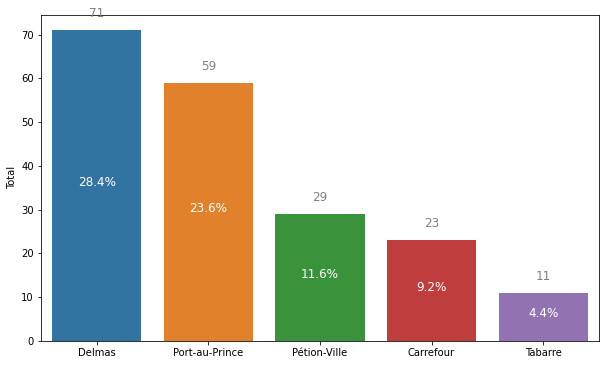

,Total,Percent
Delmas,71,0.284
Port-au-Prince,59,0.236
Pétion-Ville,29,0.116
Carrefour,23,0.092
Tabarre,11,0.044


In [891]:
prob_category(data=solution6,col="Commune_FR", show_plot=True,figsize= (10,6))

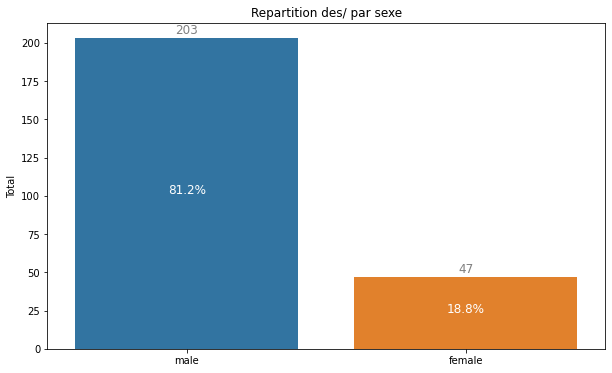

,Total,Percent
male,203,0.812
female,47,0.188


In [892]:
prob_category(data=solution6,col="gender_x",show_plot=True,figsize= (10,6), title="Repartition des/ par sexe")

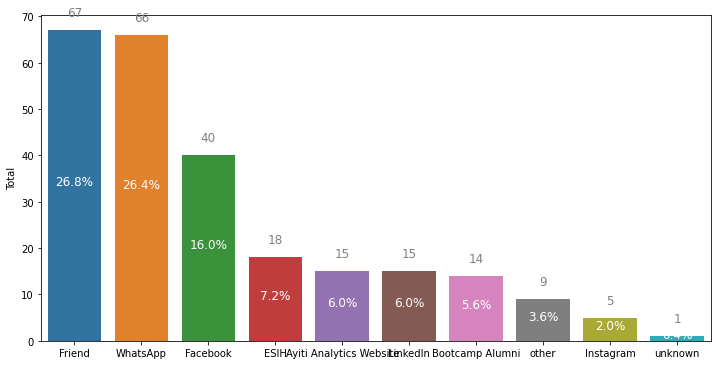

,Total,Percent
Friend,67,0.268
WhatsApp,66,0.264
Facebook,40,0.160
ESIH,18,0.072
Ayiti Analytics Website,15,0.060
LinkedIn,15,0.060
Bootcamp Alumni,14,0.056
other,9,0.036
Instagram,5,0.020
unknown,1,0.004


In [893]:
prob_category(data=solution6,top_n=10,col="hear_AA_1_x",show_plot=True,figsize= (12,6))

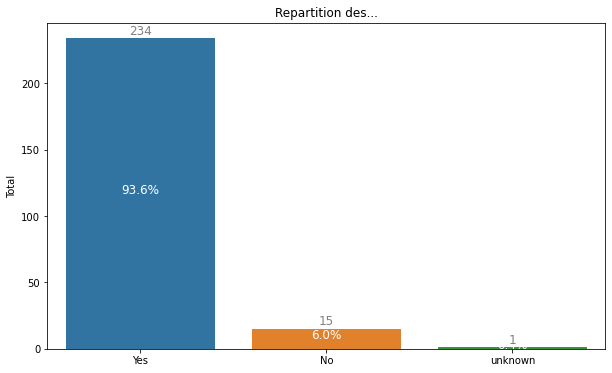

,Total,Percent
Yes,234,0.936
No,15,0.060
unknown,1,0.004


In [894]:
prob_category(data=solution6,col="have_computer_home_x",show_plot=True,figsize= (10,6), title="Repartition des...")

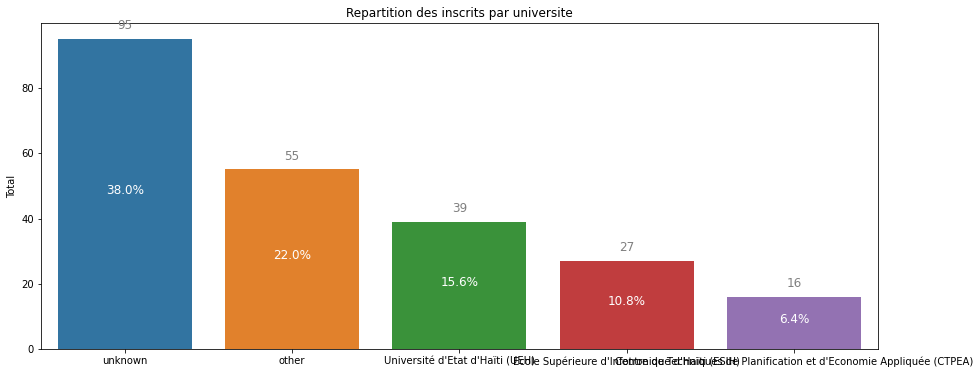

,Total,Percent
unknown,95,0.380
other,55,0.220
Université d'Etat d'Haïti (UEH),39,0.156
Ecole Supérieure d'Infotronique d'Haïti (ESIH),27,0.108
Centre de Techniques de Planification et d'Economie Appliquée (CTPEA),16,0.064


In [895]:
prob_category(data=solution6,col="university_y",show_plot=True,figsize= (15,6), title="Repartition des inscrits par universite")

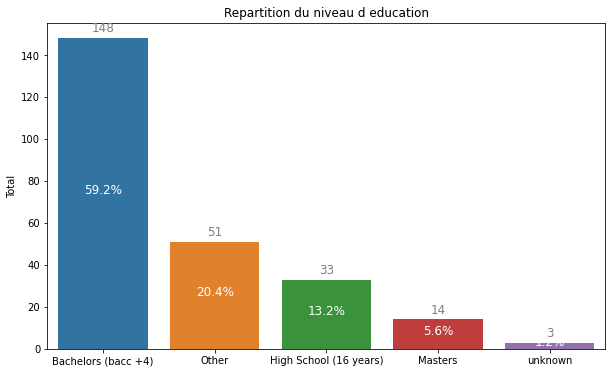

,Total,Percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012


In [896]:
prob_category(data=solution6,col="education_level_y",show_plot=True,figsize= (10,6), title="Repartition du niveau d education")

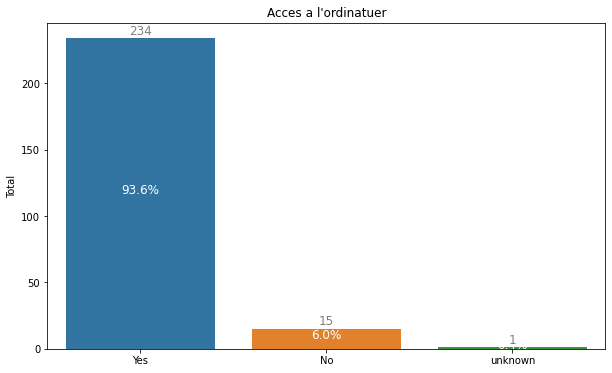

,Total,Percent
Yes,234,0.936
No,15,0.060
unknown,1,0.004


In [897]:
prob_category(data=solution6,col="have_computer_home_x",show_plot=True,figsize= (10,6), title="Acces a l'ordinatuer")

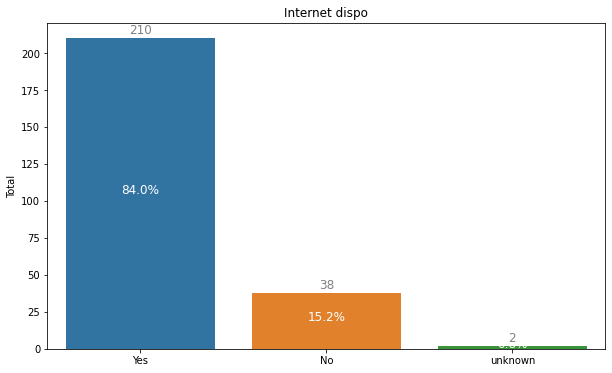

,Total,Percent
Yes,210,0.840
No,38,0.152
unknown,2,0.008


In [898]:
prob_category(data=solution6,col="internet_at_home_x",show_plot=True,figsize= (10,6), title="Internet dispo")

<AxesSubplot:xlabel='gender_x', ylabel='hear_AA_x'>

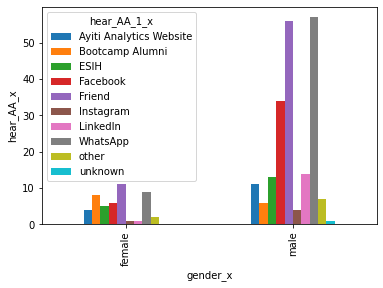

In [899]:
my_pivot2 = my_pivot2.plot(kind="bar")
#Get a matplotib figure from the axes object for formatting purpose
# my_pivot2.set_size_inches(10, 10)
#change the axes labels
my_pivot2.set_xlabel("gender_x")
my_pivot2.set_ylabel("hear_AA_x")
my_pivot2

In [907]:
#Ayiti Analytics objective is to know which three communes of the country will be the most likely to expand its training centers.
# Selection criteria for municipalities:
#1- "The greatest number of registrants".
#2- How many of them have already payed
#3-If we apply this criteria
#Find how many applicants by Commune
total_enscript_by_commune= solution6.Commune_FR.value_counts(normalize=False).to_frame()
total_enscript_by_commune.rename(columns={"Commune_FR": "Total"},inplace=True)
#print(total_enscript_by_commune)
#Find how many applicants by "commune" and "Amount_Payed"
Total_Pay_By_Commune =solution6.groupby(by=["Commune_FR"]).amount_dollars.sum().to_frame()
Total_Pay_By_Commune.rename(columns={"amount_dollars": "Total Pay"},inplace=True)
Total_Pay_By_Commune.sort_values(by=['Total Pay'],  ascending=False, inplace=True)
#print(Total_Pay_By_Commune)
#Find percent pay by commune
Percent_pay_by_Commune = Total_Pay_By_Commune =solution6.groupby(by=["Commune_FR"]).amount_dollars.sum().to_frame()/solution6.shape[0]
Percent_pay_by_Commune.rename(columns={"amount_dollars": "Percent_Pay"},inplace=True)
Percent_pay_by_Commune.sort_values(by=['Percent_Pay'],  ascending=False, inplace=True)
#print(Percent_pay_by_Commune)
Valid_Commune= pd.concat([Percent_pay_by_Commune,total_enscript_by_commune],axis=1)
print(Valid_Commune)
t =total_enscript_by_commune.reset_index()
t.drop(t.index[t['index'] == 'Port-au-Prince'], inplace = True)
solution5.columns

                                Percent_Pay  Total
Delmas                                 0.32     71
Port-au-Prince                         0.24     59
Croix-Des-Bouquets                     0.08     10
Jacmel                                 0.08      3
Verrettes                              0.08      3
Mirebalais                             0.08      3
Saint-Louis du Nord                    0.00      1
Saint-Marc                             0.00      4
Sainte Suzanne                         0.00      1
Pétion-Ville                           0.00     29
Léogâne                                0.00      2
Port-Salut                             0.00      1
Plaine du Nord                         0.00      1
Petite Rivière de l'Artibonite         0.00      1
Petite Rivière de Nippes               0.00      1
Petit-Goâve                            0.00      1
Tabarre                                0.00     11
Ouanaminthe                            0.00      3
Mombin Crochu                  

Index(['gender_x', 'dob_x', 'commune_x', 'created_at_x_x', 'department_x',
       'education_level_x', 'university_x', 'study_domain_x',
       'current_employed_x', 'formal_sector_job_x', 'have_computer_home_x',
       'hear_AA_1_x', 'internet_at_home_x', 'quest_id', 'started_at_x',
       'activated_at_x', 'completed_x', 'percentage_completed_x',
       'created_at_y_x', 'user_id_x', 'Accounting_x', 'Computer Science_x',
       'Economics_x', 'Electrical Engineering_x', 'Law_x', 'Management_x',
       'Medicine_x', 'Statistics_x', 'other_x', 'Bash', 'Excel', 'Git', 'Java',
       'JavaScript', 'PHP', 'PowerBI or Tableau', 'Python', 'R', 'SQL', 'VBA',
       'other_y', 'Accounting_y', 'Computer Science_y', 'Economics_y',
       'Electrical Engineering_y', 'Law_y', 'Management_y', 'Medicine_y',
       'Statistics_y', 'other', 'Commune_FR', 'Departement', 'gender_y',
       'dob_y', 'commune_y', 'created_at_x_y', 'department_y',
       'education_level_y', 'university_y', 'study_domain_